#Capstone Project: Train an AI Agent to Play Flappy Bird
## Introduction
The goal of this project is to understand and implement the process of training an AI agent to play the Flappy Bird game using computer vision and reinforcement learning.


## 1. Environment Setup
### Install necessary libraries


In [4]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install gym
!pip install PyGame
!git clone https://github.com/ntasfi/PyGame-Learning-Environment.git
%cd PyGame-Learning-Environment
!pip install -e .
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\presc\OneDrive\Desktop\Computer Vision\Capstone Project\PyGame-Learning-Environment


fatal: destination path 'PyGame-Learning-Environment' already exists and is not an empty directory.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Obtaining file:///C:/Users/presc/OneDrive/Desktop/Computer%20Vision/Capstone%20Project/PyGame-Learning-Environment
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for ple (pyproject.toml): started
  Building editable for ple (pyproject.toml): finished with status 'done'
  Created wheel for ple: filename=ple-0.0.1-0.editable-py3-none-any.whl size=5128 sha256=b275f42af3861823bea94d03bc17ecf68c045855f5cba2f8b263f2cb018b7fa8
  Stored in directory: C:\Users\pr


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Set up the Flappy Bird environment using PyGame Learning Environment

In [6]:
class CustomFlappyEnv:
    def __init__(self, ple_env):
        self.env = ple_env
        self.reward_alive = 0.1
        self.reward_death = -5.0
        self.reward_pipe = 1.0

    def init(self):
        self.env.init()

    def reset_game(self):
        self.env.reset_game()

    def game_over(self):
        return self.env.game_over()

    def getScreenRGB(self):
        return self.env.getScreenRGB()

    def getActionSet(self):
        return self.env.getActionSet()

    def act(self, action):
        raw_reward = self.env.act(action)
        if self.env.game_over():
            return self.reward_death
        elif raw_reward > 0:  # Passed a pipe
            return self.reward_pipe
        else:
            return self.reward_alive


In [7]:
from ple.games.flappybird import FlappyBird
from ple import PLE

#Create the game
game = FlappyBird()
ple_env = PLE(game, display_screen=False)
env = CustomFlappyEnv(ple_env)

#game = FlappyBird()
#env = PLE(game, fps=30, display_screen=True)

#Initialize the environment
env.init()

#Get possible actions
action_set = env.getActionSet()
print("Available actions:", action_set)

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom
Available actions: [119, None]


### Preprocessing function to resize and normalize game frames

In [9]:
#preprocessing function
def preprocess_frame(frame, size=(160, 160), grayscale=False):
  if grayscale:
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
  frame = cv2.resize(frame, size, interpolation=cv2.INTER_AREA)
  frame = frame.astype(np.float32) / 255.0


  return frame

## Pre-trained Model Integration
### Load a pre-trained model from Keras applications. The MobileNetV2 will be used due to it being less computationally demanding. To modify the MobileNetV2 model for feature extraction, I will remove thre top layers that are used for classification. This way the model will only act as a feature extractor, providing high-level representation of the input image.

In [32]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.optimizers import Adam

input_shape = (160, 160, 3)

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Feature extraction
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add custom dense layers for the Q-network
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

# Output layer: Q-values for each action
output = Dense(2, activation='softmax')(x)

# Final Q-network model
model = Model(inputs=base_model.input, outputs=output)

# Comile the model with an Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='spares_categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 80, 80, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 80, 80, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 80, 80, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 80, 80, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 80, 80, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 80, 80, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 80, 80, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 80, 80, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 80, 80, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 80, 80, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 80, 80, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 81, 81, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 40, 40, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,422,216 (9.24 MB)

 Trainable params: 164,232 (641.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Reinforcement Learning Implementation
### Immplement the DQNAgent class with the init, build_model, remember, act, and replay methods.

In [40]:
from tensorflow.keras.models import load_model
import numpy as np

class DQNAgent:
    def __init__(self, model_path, state_shape=(160, 160, 3), action_size=2):
        self.state_shape = state_shape
        self.action_size = action_size

        # Load trained model
        self.model = load_model(model_path)

    def act(self, state):
        """Choose the best action (greedy) based on Q-values."""
        q_values = self.model.predict(np.expand_dims(state, axis=0), verbose=0)
        return np.argmax(q_values[0])



## Model Training
### Setting up the training loop to interact with the Flappy Bird environment.


*   Implement frame skipping for efficiency.
*   Store experiences and perform learning steps.
*   Periodically update the target network.
*   Implement a decay schedule for the exploration rate.



Episode 001 | Reward: 1.10 | Steps: 16
Episode 002 | Reward: 1.10 | Steps: 16
Episode 003 | Reward: 1.10 | Steps: 16
Episode 004 | Reward: 1.10 | Steps: 16
Episode 005 | Reward: 1.10 | Steps: 16
Episode 006 | Reward: 1.10 | Steps: 16
Episode 007 | Reward: 1.10 | Steps: 16
Episode 008 | Reward: 1.10 | Steps: 16
Episode 009 | Reward: 1.10 | Steps: 16
Episode 010 | Reward: 2.60 | Steps: 17
Episode 011 | Reward: 8.10 | Steps: 29
Episode 012 | Reward: 1.10 | Steps: 16
Episode 013 | Reward: 1.30 | Steps: 16
Episode 014 | Reward: 1.10 | Steps: 16
Episode 015 | Reward: 1.30 | Steps: 16
Episode 016 | Reward: 1.10 | Steps: 16
Episode 017 | Reward: 1.10 | Steps: 16
Episode 018 | Reward: 1.10 | Steps: 16
Episode 019 | Reward: 1.10 | Steps: 16
Episode 020 | Reward: 1.10 | Steps: 16
Episode 021 | Reward: 1.10 | Steps: 16
Episode 022 | Reward: 1.10 | Steps: 16
Episode 023 | Reward: 1.10 | Steps: 16
Episode 024 | Reward: 1.10 | Steps: 16
Episode 025 | Reward: 2.80 | Steps: 18
Episode 026 | Reward: 1.3

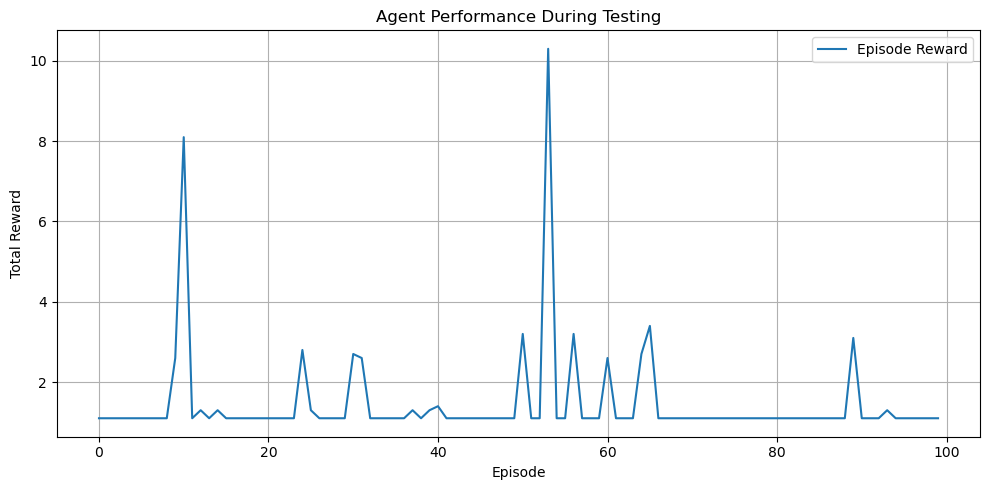

In [43]:
import cv2
import time
import numpy as np
import os

# --- Testing ---
reward_history = []
EPISODES = 100

# Initialize the agent
agent = DQNAgent(
    model_path='checkpoints/best_model.keras',
    state_shape=(160, 160, 3),
    action_size=len(action_set)
)

for episode in range(1, EPISODES + 1):
    env.reset_game()
    state_raw = env.getScreenRGB()
    state = preprocess_frame(state_raw)
    total_reward = 0
    steps = 0

    while not env.game_over():
        action_idx = agent.act(state)
        action = action_set[action_idx]
        cumulative_reward = 0

        for _ in range(FRAME_SKIP):
            reward = env.act(action)
            cumulative_reward += reward
            if env.game_over():
                break

        next_state_raw = env.getScreenRGB()
        state = preprocess_frame(next_state_raw)
        total_reward += cumulative_reward
        steps += 1

    reward_history.append(total_reward)
    print(f"Episode {episode:03d} | Reward: {total_reward:.2f} | Steps: {steps}")

## Testing and Evaluation

*   Implement a separate testing script to evaluate the trained agent.
*   Record metrics such as average score and survival time.
*   Visualize the agent's performance using matplotlib or a similar library.



In [ ]:
# --- Plot Reward Curve ---
plt.figure(figsize=(10, 5))
plt.plot(reward_history, label='Episode Reward')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Agent Performance During Testing")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("test_reward_curve.png")
plt.show()
